29ноя23
# Матрицы. Начало
* Что такое матрица?
* Каков тайный смысл определителя?
* Что такое транспонирование матрицы?
* Как складывать/вычитать матрицы?
* Как умножать матрицы?

### Мое общение с gpt
<img src="https://raw.githubusercontent.com/teacher57/data_analysis_course/main/files/l8p1.png" width="1000" height="1000">

Все-таки я надеюсь, что мы с тобой будем писать нейросети в следующем полугодии. Можешь считать это обещанием. Для понимания теории работы нейросетей необходимо сначала разобрать матрицы и операции с матрицами. Твой преподаватель по алгебре уверил меня, что вы проходили матрицы на уроках с ним в прошлом году, но я отлично понимаю, что прошлый год для нас обоих был очень давно, так что нужно некоторое время, чтобы вспомнить.

Я **НЕ** буду рассказывать о том, как матрицы помогают решать дифференциальные уравнения, вместо этого в течение пары следующих уроков мы пройдем **сложение**, **вычитание**, **перемножение** матриц, **нахождение определителя**, **решение линейных уравнений**, а также **применение функции к матрице**. Часть из этого мы разберем сегодня, а часть – на следующем уроке.

**Матрица – один из лучших фильмов, что я видел, очень советую.** Я должен был про это пошутить!

**Матрица – числа записанные в прямоугольник.** Как будто бы, это все определение, которое нужно знать, если серьезно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib notebook

# в матанализе матрицы обычно называют большими буквами
# последую этому примеру

A = np.random.randint(0, 10, size=(3, 4))
A

array([[7, 8, 7, 1],
       [8, 9, 7, 9],
       [7, 4, 3, 9]])

Пример матрицы, то есть чисел, записанных в прямоугольник, в данном случае квадрат $(3, 4)$. Сначала записывают количество строк, а потом количество столбцов, так же, как размер DataFrame. Это называется размерностью матрицы. 
## Транспонирование матрицы 
– это операция, при которой строки матрицы становятся столбцами, а столбцы - строками. Если размер матрицы был $(x, y)$, размер транспонированной матрицы будет $(y, x)$.

In [2]:
B = np.array([[1,  2,  3,  4], 
              [5,  6,  7,  8],
              [9, 10, 11, 12]])

# опа! в одну строчку транспонирование написал!
def t(A):
    return np.array([[A[j][i] for j in range(len(A))] for i in range(len(A[0]))])

t(B)

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

Была матрица размера $(3, 4)$, стала $(4, 3)$. Это я имею в виду, когда говорю "строки матрицы становятся столбцами, а столбцы - строками".
## Сложение и разность
Со сложением все просто, складывать можно только матрицы одинакового размера. Сумма матриц это матрица, в которой каждый элемент равен сумме элементов суммируемых матриц с такими же координатами.

In [3]:
A + B

array([[ 8, 10, 10,  5],
       [13, 15, 14, 17],
       [16, 14, 14, 21]])

Аналогично, разность матриц это разность элементов с соответстующими координатами.

In [4]:
A - B

array([[ 6,  6,  4, -3],
       [ 3,  3,  0,  1],
       [-2, -6, -8, -3]])

Структура данных *array* позволяет выполнять матричные операции, спасибо ей за это, но при выполнении домашки, пользоваться ей будет нельзя.

## Определитель матрицы
Самое важное: **определитель можно искать только в квадратной матрице**!

Как у многих понятий в математике, у определителя матрицы есть геометрический и алгебраический смысл (и наверняка еще много других). 

Геометрический смысл определителя матрицы заключается в том, что он позволяет нам понять, как векторы, представленные строками матрицы, изменяют размерность и ориентацию пространства.

Представьте, что у вас есть матрица, каждая строка которой представляет собой вектор в n-мерном пространстве. Определитель этой матрицы позволяет нам определить объем n-мерного параллелепипеда, образованного этими векторами. Если определитель равен нулю, это говорит о том, что векторы линейно зависимы, что означает, что объем этого параллелепипеда равен нулю.

Если определитель не равен нулю, это показывает, что векторы образуют базис в n-мерном пространстве, и они не лежат на одной плоскости, а растягивают или сжимают пространство в зависимости от величины определителя.

Таким образом, геометрический смысл определителя матрицы заключается в изучении изменений размерности, ориентации и объема пространства, вызываемых действием векторов, представленных матрицей.

Вот, что я имею в виду.

<IPython.core.display.Javascript object>


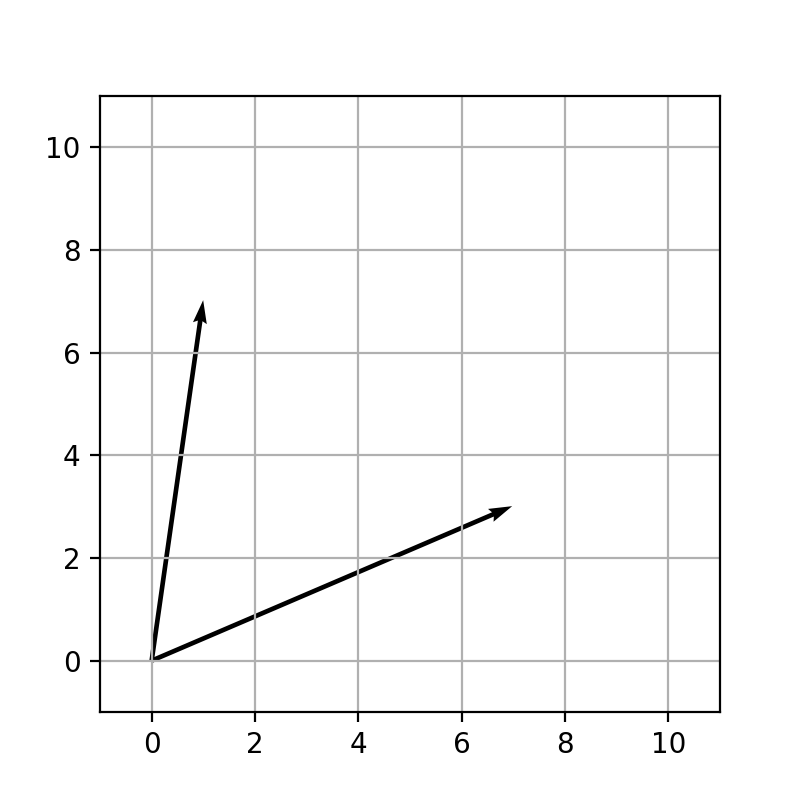

In [5]:
A2d = np.array([[7, 3], 
                [1, 7]])

origin = np.zeros((2, 2))

fig, ax = plt.subplots(figsize=(4, 4))
ax.quiver(*origin, A2d[:, 0], A2d[:, 1], units='xy', scale=1)
plt.xlim(-1, 11) 
plt.ylim(-1, 11)
plt.grid()
plt.show()

На графике два вектора, каждый из которых – одна из строк матрицы *A2d*. Если посчитать площадь параллелограмма, образованного этими векторами, мы получим определитель матрицы *A2d*.

In [6]:
np.linalg.det(A2d)

46.0

Если поменять местами строки в матрице *A2d* поменяются местами и векторы, так что определитель получится отрицательным. Пусть тебя такое не пугает, отрицательный определитель – тоже определитель, ничего в этом страшного нет.

In [7]:
A2d = np.array([[1, 7], 
                [7, 3]])
np.linalg.det(A2d)

-46.0

Удивительно, но это правило работает для любой матрицы $(n, n)$. Определитель матрицы это обьем многомерного параллелепипеда, образованного ее векторами-строками. Не менее удивительно, что параллелограмм, образованный ее вектор-столбцами будет иметь такую же площадь.

Хорошая новость заключается в том, что для матрицы $(2, 2)$ определитель всегда будет равен разности произведений главной и побочной диагоналей. То есть для матрицы *A2d*, определитель будет равен: 
$$7 \cdot 7 - 1 \cdot 3 = 49 - 3 = 46$$
Но что же делать с матрицами большего размера? А вот, что!

In [8]:
A3d = np.array([[ 1, -2,  3],
                [-4,  5,  6],
                [ 7,  8, -9]])

Существует много способов нахождения определителя матрицы $(3, 3)$, но я расскажу о том, который будет работать для матрицы любого размера. В матане взятие определителя записывают $det(A)$, от английского determinant (определитель).

$$det(A) = a_{11} \cdot M_{11} - a_{12} \cdot M_{12} + a_{13} \cdot M_{13} - a_{14} \cdot M_{14} ... + a_{1n} \cdot 1 ^ {1 + n} \cdot M_{1 + n}$$

В этой формуле $a_{xy}$ это элемент матрицы с координатами $(x, y)$, а $M_{xy}$ это определитель матрицы, составленной из всех элементов изначальной матрицы, исключая строку $x$ и столбец $y$. То, что я обозначил за M в матане называют минором.
Для нашей матрицы минорами будут определители этих матриц:

In [9]:
A_11 = np.array([[5,  6],
                 [8, -9]])

A_12 = np.array([[-4,  6],
                 [ 7, -9]])

A_13 = np.array([[-4, 5],
                 [ 7, 8]])

# я выведу их определители, так как это матрицы 2х2, как их считать, рассказано выше

M_11, M_12, M_13 = np.linalg.det(A_11), np.linalg.det(A_12), np.linalg.det(A_13)
M_11, M_12, M_13

(-93.00000000000003, -6.000000000000001, -66.99999999999997)

Мы узнали, чему равны наши миноры, значит можем найти определитель изначальной матрицы *A*.

In [10]:
det_A3d = A3d[0, 0] * M_11 - A3d[0, 1] * M_12 + A3d[0, 2] * M_13
det_A3d

-305.99999999999994

In [11]:
# проверка
np.linalg.det(A3d)

-306.0

Определитель получился отрицательным, как я уже сказал, это вполне обычное дело.

## Умножение
Задам две новые матрицы, потому что умножение работает абсолютно иным способом. Произведение матриц AB состоит из всех возможных комбинаций скалярных произведений вектор-строк матрицы A и вектор-столбцов матрицы B. Что это значит?

In [12]:
A = np.array([[1, 2, 3]]) # вектор-строка
B = np.array([[1], [2], [3]]) # вектор-столбец
A.dot(B)

array([[14]])

При перемножении вектор-столбца на вектор-строку получается матрица в которой будет столько столбцов, сколько в вектор-строке, и столько строк, сколько их в вектор-столбце.

In [13]:
B.dot(A)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

Соответственно, перемножение матриц, это получение всех комбинаций перемножения строк и столбцов.

In [14]:
A = np.random.randint(0, 10, (3, 2)) 
A

array([[9, 9],
       [7, 5],
       [3, 1]])

In [15]:
B = np.random.randint(0, 10, (2, 3))
B

array([[0, 5, 5],
       [4, 1, 4]])

Так вот, перемножение матриц это лютая хрень, я не понимаю, как математики прошлого додумались, что именно такая рандомная последовательность действий приведет к тому, что поможет им решать уравнения.

In [16]:
A.dot(B)

array([[36, 54, 81],
       [20, 40, 55],
       [ 4, 16, 19]])

Если перемножаются матрицы $A$ (размера $(a, b)$) и $B$ (размера $(c, d)$), во-первых, перемножение возможно только в случае, когда $b = c$, во-вторых, размер получившейся матрицы будет $(a, d)$. Стоит заметить, что $A \cdot B \neq B \cdot A$, а в случае, если матрицы $A$ и $B$ не квадратные, то и размеры итоговых матриц при перемножении $A \cdot B$, $B \cdot A$ будут разными.

In [17]:
B.dot(A)

array([[50, 30],
       [55, 45]])

---

## Задачи для самостоятельного выполнения

Дедлайн 5дек23 23:59.

При написании кода нельзя пользоваться **никакими** сторонними библиотеками.

### Вариант 1
Для обеих Маш, Марго, Кристины, Лизы и Златы. А также, может быть когда-нибудь, для Дани и (ну, вдруг) для Гриши.

1. **Найти меня**, получить от меня **матрицу** и при мне же **найти ее определитель**, это будет матрица 3х3 или 4х4.
2. **Написать функцию.** Функция принимает на вход два списка (A, B). Возвращает список, результат перемножения матриц A и B, или выводит ошибку, если перемножить матрицы невозможно.

### Вариант 2
Для обеих Арин, Иры, Ульяны, Вардана и Веры. 

1. **Найти меня**, получить от меня **две матрицы** и при мне же их **перемножить**.
2. **Написать функцию.** Функция принимает на вход список A. Возвращает число, определитель матрицы А, или выводит ошибку, если определитель найти невозможно.